In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# # import evaluation as ev
# from skimage.measure import compare_psnr as psnr
# from skimage.measure import compare_ssim as ssim
# from sklearn.metrics import mean_absolute_error as sk_mae
# from sklearn.metrics import mean_squared_error as sk_mse
# import sewar

plt.rcParams['image.cmap'] = 'gray'

# # Mean Absolute Error
# def computeMAE(real, pred):
#     return sk_mae(real.flatten(), pred.flatten())


# # Mean Squared error
# def computeMSE(real_scan, rec_scan):
#     assert(real_scan.shape == rec_scan.shape)
#     return np.square((real_scan - rec_scan)).mean()


# # Peak Signal to Noise Ratio
# def computePSNR(real_scan, rec_scan):
#     # scan was normalised to [1, -1], so peak value is 1
#     peak = 1.0
#     return 20 * np.log10(peak / np.sqrt(computeMSE(real_scan, rec_scan)))


# path to test data
test_path = './data/visceral_full/test'

seg_path = './data/visceral_full/test/annotations'

# path to test results
res_path = '../pytorch-CycleGAN-and-pix2pix/results/ct_mr_visceral_spine_5'

test_files = [ p for p in os.listdir(test_path) if 'npz' in p]
res_files = [ p for p in os.listdir(res_path) if 'rec' in p]
print(test_files, len(test_files))
print(res_files, len(res_files))
print(os.listdir(seg_path))

['10000005_1_CT_wb.npz', '10000135_1_CTce_ThAb.npz', '10000136_1_CTce_ThAb.npz', '10000365_4_MRT1cefs_Ab.npz', '10000003_3_MRT1_wb.npz', '10000006_1_CT_wb.npz', '10000381_4_MRT1cefs_Ab.npz', '10000001_3_MRT1_wb.npz'] 8
['rec_10000365_4_MRT1cefs_Ab.npz', 'rec_10000381_4_MRT1cefs_Ab.npz', 'rec_10000003_3_MRT1_wb.npz', 'rec_10000001_3_MRT1_wb.npz', 'rec_10000136_1_CTce_ThAb.npz', 'rec_10000005_1_CT_wb.npz', 'rec_10000135_1_CTce_ThAb.npz', 'rec_10000006_1_CT_wb.npz'] 8
['10000005_1_CT_wb.npz', '10000135_1_CTce_ThAb.npz', '10000136_1_CTce_ThAb.npz', '10000365_4_MRT1cefs_Ab.npz', '10000003_3_MRT1_wb.npz', '10000006_1_CT_wb.npz', '10000381_4_MRT1cefs_Ab.npz', '10000001_3_MRT1_wb.npz']


In [2]:
import sklearn.metrics

print(sklearn.metrics.mean_absolute_error)

print(computeMSE(np.array([0, 0, 0]), np.array([1, 1, 1])))

<function mean_absolute_error at 0x7f9f422577b8>
1.0


In [4]:
def display_slice(scan, slice_num):
    plt.figure(figsize=(10, 10))
    plt.imshow(scan[:, slice_num, :])
    plt.show()

def normalise_zero_mean_unit_var(arr):
    mean = arr.mean()
    std = arr.std()
    return (arr - mean) / std, mean, std


def denormalise_zero_mean_unit_var(arr, mean, std):
    return arr * std + mean


# normalise to [-1 1]
def normalise_tanh(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    return 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1, min_val, max_val


def denormalise_tanh(arr, min_val, max_val):
    return ((arr + 1) / 2) * (max_val - min_val) + min_val


# center data and normalise to -1 and 1
def normalise_scan(scan):
    # set data to zero mean and unit variance
    normalised_scan, mean, std = normalise_zero_mean_unit_var(scan)
    
    # normalise to -1 and 1
    # min_val and max_val are the min and max values of normalised numpy array
    normalised_scan, min_val, max_val = normalise_tanh(normalised_scan)
    return normalised_scan, mean, std, min_val, max_val


def denormalise_scan(nrml_scan, mean, std, min_val, max_val):
    denormalised = denormalise_tanh(nrml_scan, min_val, max_val)
    return denormalise_zero_mean_unit_var(denormalised, mean, std)


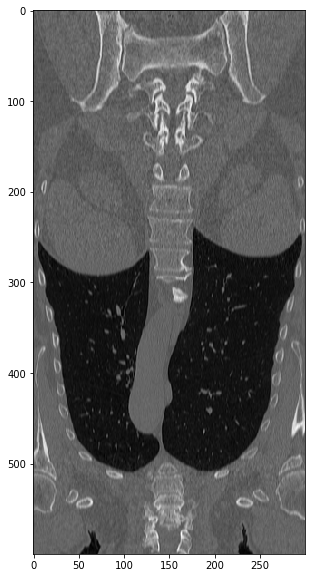

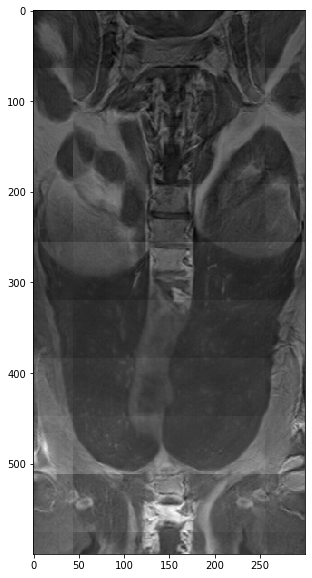

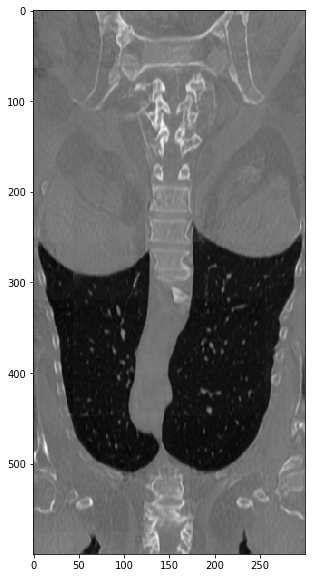

10000005_1_CT_wb.npz 48.940155 29.699901048443238 0.7978355660424332 0.8899521350105438 0.18008382662869166


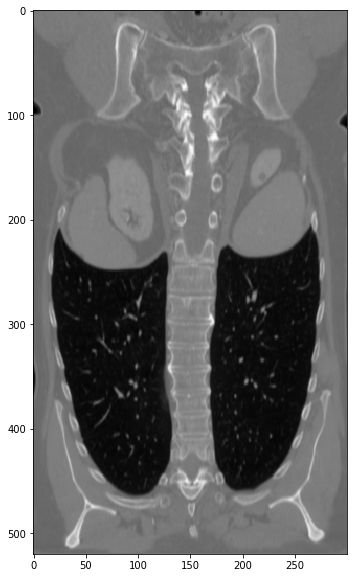

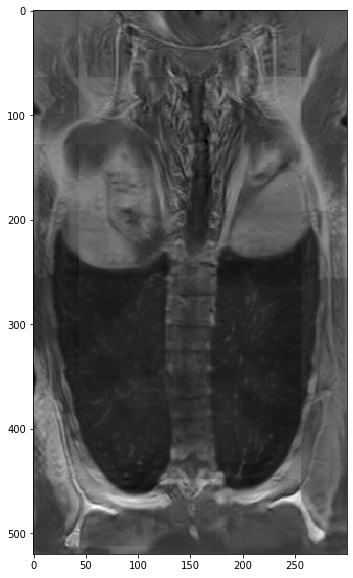

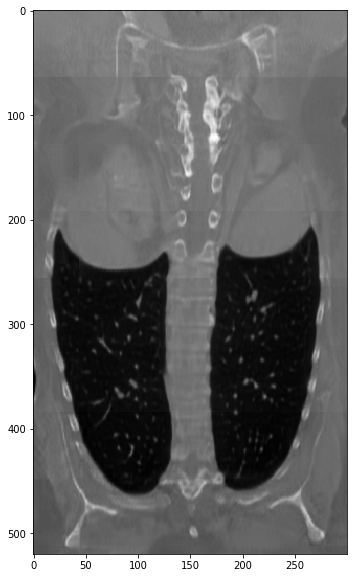

10000135_1_CTce_ThAb.npz 36.55145 27.574446632901513 0.8617460205814357 0.9320518928493335 0.5479490187812578


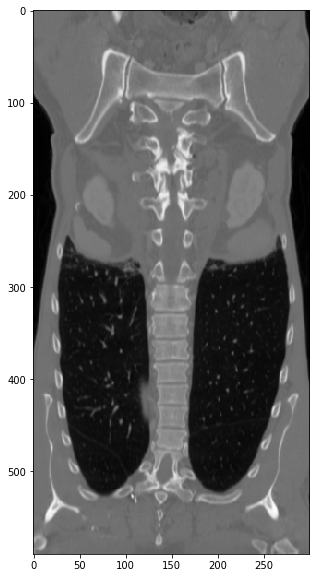

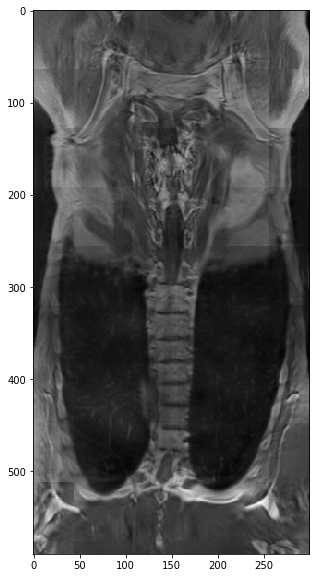

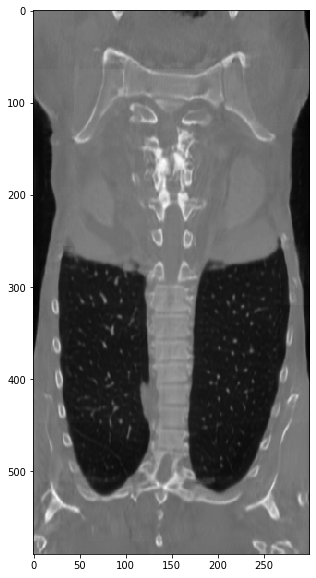

/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000136_1_CTce_ThAb.npz 24.080507 32.25418740011915 0.8848642320430159 0.9570476732521314 0.31042480992923777


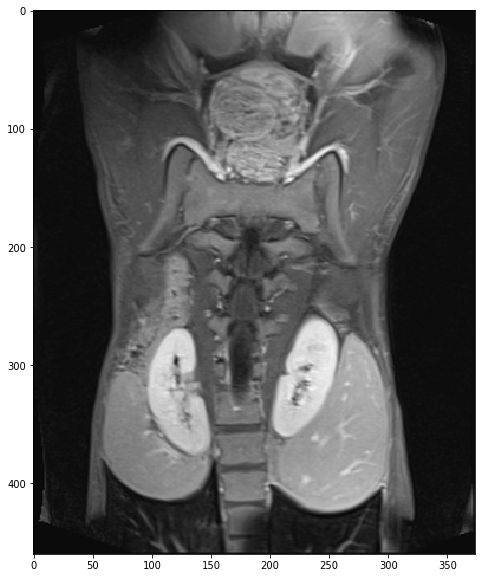

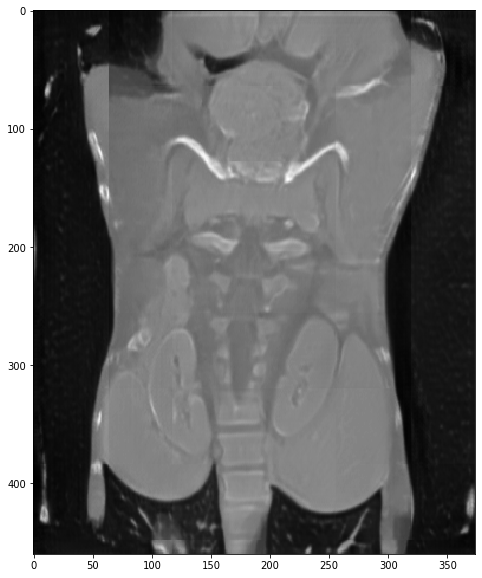

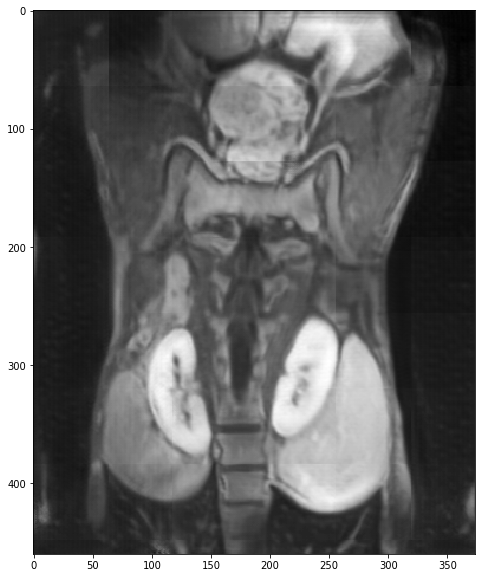

/home/sekuboyina_aux/anaconda3/envs/old_pytorch/lib/python3.6/site-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:22: UserWarning: Supplied images have different dtypes float64 and float32
  warnings.warn(msg)
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000365_4_MRT1cefs_Ab.npz 12.780179864915434 23.36451422267665 0.9341408555937531 0.9649298621513387 0.4864881180895226


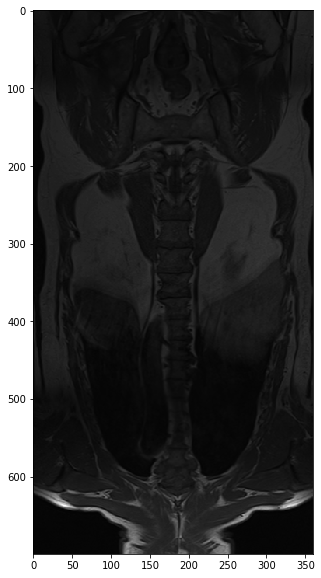

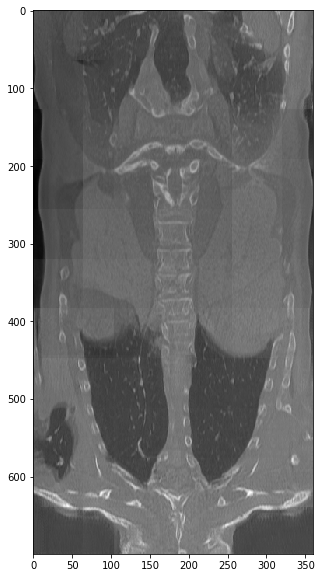

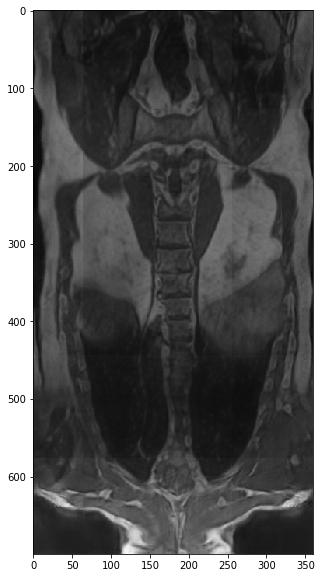

/home/sekuboyina_aux/anaconda3/envs/old_pytorch/lib/python3.6/site-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:22: UserWarning: Supplied images have different dtypes float64 and float32
  warnings.warn(msg)
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000003_3_MRT1_wb.npz 22.07823990911479 21.027006463106233 0.8884824364864677 0.9043999462166011 0.40742311225585237


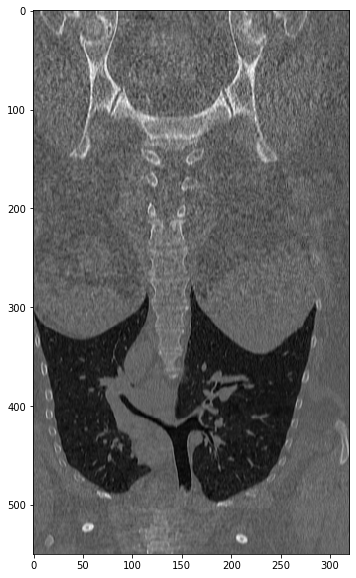

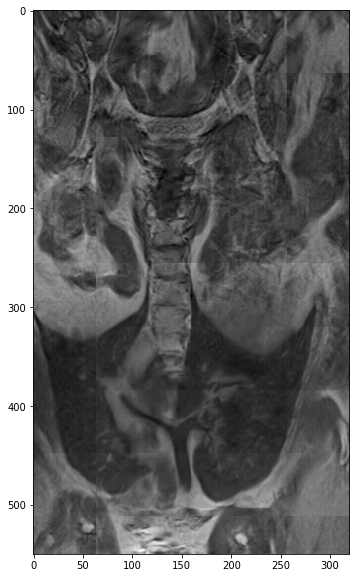

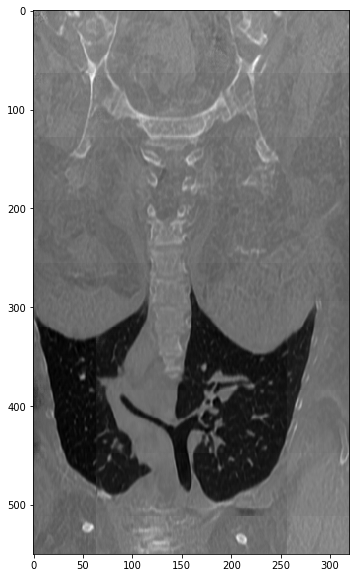

/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000006_1_CT_wb.npz 22.42447 35.007193126936315 0.8351532263579566 0.8968119998671253 0.173386853744717


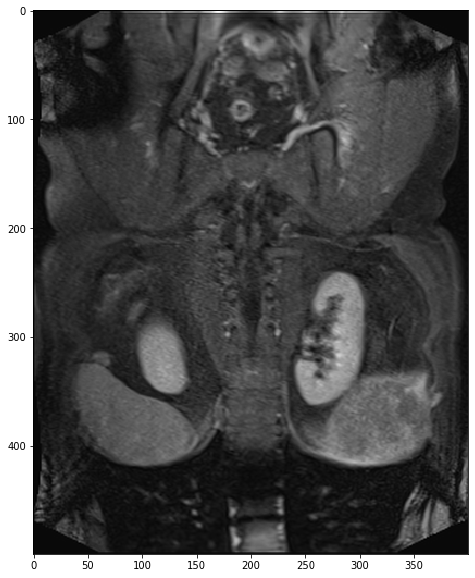

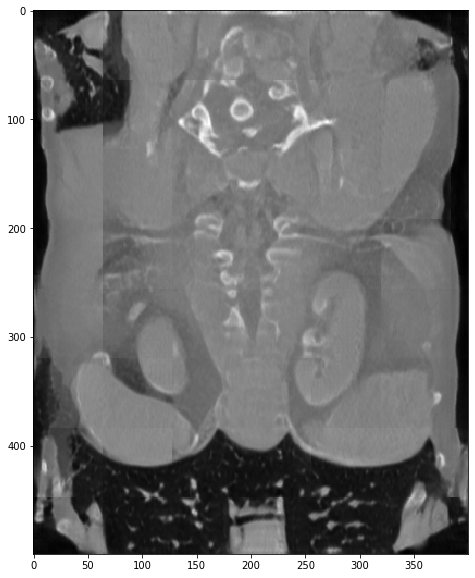

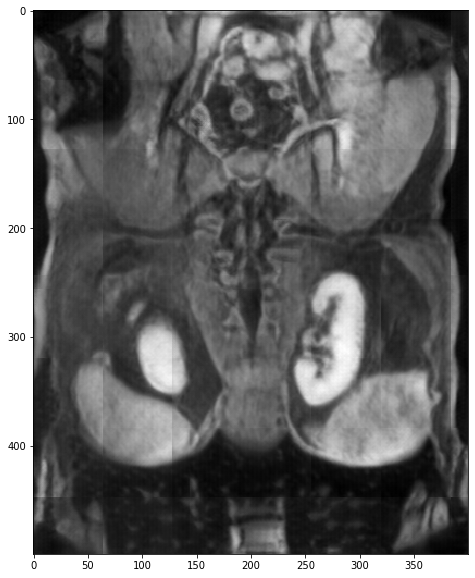

/home/sekuboyina_aux/anaconda3/envs/old_pytorch/lib/python3.6/site-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:22: UserWarning: Supplied images have different dtypes float64 and float32
  warnings.warn(msg)
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000381_4_MRT1cefs_Ab.npz 3.953851701305216 31.34039227321614 0.8947471008559705 0.9647725155324269 0.42939514196972106


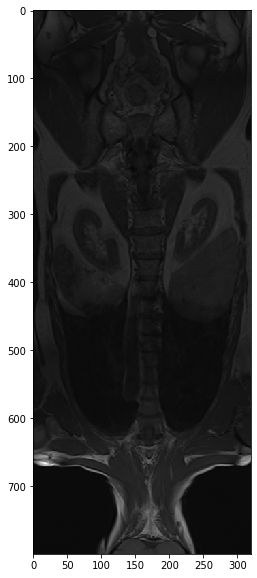

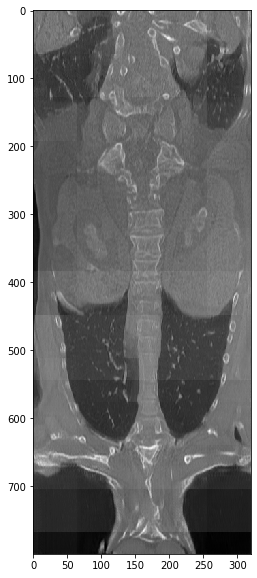

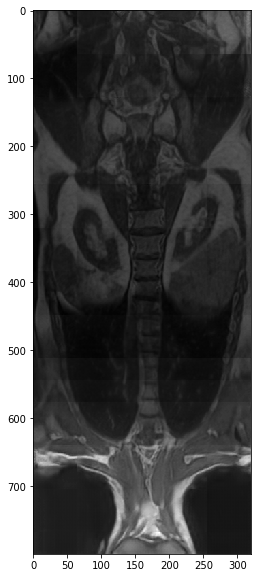

/home/sekuboyina_aux/anaconda3/envs/old_pytorch/lib/python3.6/site-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:22: UserWarning: Supplied images have different dtypes float64 and float32
  warnings.warn(msg)
/home/sekuboyina_aux/rafdi/ct-mr-translation/sewar.py:427: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


10000001_3_MRT1_wb.npz 16.706600675565262 24.268694517845134 0.8872227072932188 0.9139711533949428 0.3715019303258934


In [4]:
def is_ct(filename):
    return 'ct' in filename.lower()

maes_ct = []
psnrs_ct = []
uqi_ct = []
vif_ct = []
ssim_ct = []

maes_mr = []
psnrs_mr = []
uqi_mr = []
vif_mr = []
ssim_mr = []


for p in test_files:
    test_file = '{}/{}'.format(test_path, p)
    seg_file = '{}/{}'.format(seg_path, p)
    res_file = '{}/rec_{}'.format(res_path, p)
    fake_file = '{}/fake_{}'.format(res_path, p)
    seg = np.load(seg_file)['data']
    mask = np.where(seg == 0, seg, 1)
    
    test = np.load(test_file)['data']
    fake = np.load(fake_file)['data']
    res = np.load(res_file)['data']
    
    # denormalise
    mean = np.load(test_file)['mean']
    std = np.load(test_file)['std']
    min_val = np.load(test_file)['min_val']
    max_val = np.load(test_file)['max_val']
    
    test = denormalise_scan(test, mean, std, min_val, max_val)
    res = denormalise_scan(res, mean, std, min_val, max_val)
    
    mid = test.shape[1] // 2
    display_slice(test, mid)
    display_slice(fake, mid)
    display_slice(res, mid)
        
    # apply mask
    test = np.multiply(mask, test)
    res = np.multiply(mask, res)
    
    # compute MAE
    mae_res = computeMAE(test, res)
    
    # compute PSNR
    # psnr_res = computePSNR(test, res)
    
    ssim_res = ssim(test, res)
    psnr_res = psnr(test, res, np.max(test) - np.min(test))
    uqi_res = sewar.uqi(test, res)
    vif_res = sewar.vifp(test, res)
    
    if (is_ct(test_file)):
        maes_ct.append(mae_res)
        psnrs_ct.append(psnr_res)
        uqi_ct.append(uqi_res)
        ssim_ct.append(ssim_res)
        vif_ct.append(vif_res)
    else:
        maes_mr.append(mae_res)
        psnrs_mr.append(psnr_res)
        uqi_mr.append(uqi_res)
        ssim_mr.append(ssim_res)
        vif_mr.append(vif_res)
    
    # display middle slice (coronal)
    
    print(p, mae_res, psnr_res, ssim_res, uqi_res, vif_res)


In [15]:
test.size

29440000

In [5]:
"""

Visceral_2 Results
10000005_1_CT_wb.npz 925864450.0 30.48246914420983 0.7599897197482931
10000135_1_CTce_ThAb.npz 1274778100.0 21.755834646048065 0.7654645362311931
10000136_1_CTce_ThAb.npz 950430900.0 25.526831055735876 0.8021289344892795
10000365_4_MRT1cefs_Ab.npz 411074601.8527565 18.987949050633336 0.8830622743488397
10000003_3_MRT1_wb.npz 807745184.8839111 19.24187037542095 0.8660906118720013
10000006_1_CT_wb.npz 386582820.0 33.351595729596134 0.7893524482247265
10000381_4_MRT1cefs_Ab.npz 277181265.4834404 22.67719135970225 0.7767833494265768
10000001_3_MRT1_wb.npz 471042267.54101944 24.63434392765352 0.8683925423931049

Averages - MAE: 688087450.9701409, PSNR, 24.582260661124998
Std - MAE: 329294618.33066654, PSNR, 4.796387800273015

Visceral_4 Results
10000005_1_CT_wb.npz 1273342600.0 28.0286668317593 0.7594118722481918
10000135_1_CTce_ThAb.npz 354973250.0 33.146447974855064 0.8693454994577233
10000136_1_CTce_ThAb.npz 443769400.0 32.26348156098361 0.8753831324894263
10000365_4_MRT1cefs_Ab.npz 412408075.09445953 18.95255373367211 0.8830912185508855
10000003_3_MRT1_wb.npz 751986490.0187225 19.94458121673371 0.8746460707752437
10000006_1_CT_wb.npz 362741920.0 33.75410331479644 0.794629382469389
10000381_4_MRT1cefs_Ab.npz 209773642.79358292 24.429631557171323 0.8175016690913198
10000001_3_MRT1_wb.npz 398363988.2445221 25.984596466388503 0.8812015666822293

Averages - MAE: 525919920.5189109, PSNR, 27.06300783204501
Std - MAE: 316514059.50698537, PSNR, 5.411856565421772

Visceral_4 final

10000005_1_CT_wb.npz 61.20896 27.827900657196203 0.7599692568700348 0.8714508999108562 0.1525567697097686
10000135_1_CTce_ThAb.npz 19.448107 33.42806116045046 0.8766381070538916 0.9733775326622136 0.6078086545872852
10000136_1_CTce_ThAb.npz 21.645685 32.89730436809461 0.8792845958673254 0.9676655576504595 nan
10000365_4_MRT1cefs_Ab.npz 20.963595823059297 19.334210057900556 0.8883169184547014 0.778436882470592 nan
10000003_3_MRT1_wb.npz 21.640987221649716 21.228857568680382 0.8828305082841552 0.5724557781595561 nan
10000006_1_CT_wb.npz 25.419617 33.89638632608898 0.7966415462794174 0.8816592510761809 nan
10000381_4_MRT1cefs_Ab.npz 9.992343426542455 23.970238491310973 0.8138134110916431 0.655878472213698 nan
10000001_3_MRT1_wb.npz 13.25673949691096 26.40188505389081 0.8848982705331127 0.5470381595240946 nan

CT Averages - MAE: 31.930591583251953, PSNR: 32.012413127957565, UQI: 0.9235383103249275
CT Std - MAE: 2.441648597157623, PSNR: 2.441648597157623, UQI: 0.04716491271834931
MR Averages - MAE: 16.463416492040608, PSNR: 22.73379779294568, UQI: 0.6384523230919851
MR Std - MAE: 2.6835467017252985, PSNR: 2.6835467017252985, UQI: 0.0902931901937655
Combined Averages - MAE: 24.19700451448344, PSNR: 27.373105460451622, UQI: 0.7809953167084565
Combined Std - MAE: 5.301387650412925, PSNR: 5.301387650412925, UQI: 0.15970973552884576

Final
Header (name, mae_res, psnr_res, ssim_res, uqi_res, vif_res)
10000005_1_CT_wb.npz 61.20896 27.827900657196203 0.7599692568700348 0.8714508999035899 0.15255676962351256
10000135_1_CTce_ThAb.npz 19.448107 33.42806116045046 0.8766381070538916 0.9733775326313847 0.6078086486380557
10000136_1_CTce_ThAb.npz 21.645685 32.89730436809461 0.8792845958673254 0.9676655576301417 0.3112737000581032
10000365_4_MRT1cefs_Ab.npz 20.963595823059297 19.334210057900556 0.8883169184547014 0.9069915638702173 0.3239793613857107
10000003_3_MRT1_wb.npz 21.640987221649716 21.228857568680382 0.8828305082841552 0.9025578088710379 0.3849834013956205
10000006_1_CT_wb.npz 25.419617 33.89638632608898 0.7966415462794174 0.8816592510730352 0.15182183130168264
10000381_4_MRT1cefs_Ab.npz 9.992343426542455 23.970238491310973 0.8138134110916431 0.8751500534403728 0.300420090714224
10000001_3_MRT1_wb.npz 13.25673949691096 26.40188505389081 0.8848982705331127 0.9202069829838881 0.34710338591796336

CT Averages - MAE: 31.930591583251953, PSNR: 32.012413127957565, UQI: 0.9235383103095379, SSIM: 0.8281333765176673, VIF: 0.3058652374053385
CT Std - MAE: 17.03824806213379, PSNR: 2.441648597157623, UQI: 0.04716491270815724, SSIM: 0.051495724833329794, VIF: 0.1860322097868694

MR Averages - MAE: 16.463416492040608, PSNR: 22.73379779294568, UQI: 0.9012266022913791, SSIM: 0.8674647770909031, VIF: 0.3391215598533796
MR Std - MAE: 4.980371889767425, PSNR: 2.6835467017252985, UQI: 0.016395488283173335, SSIM: 0.031037530756107306, VIF: 0.031201393979012258

Combined Averages - MAE: 24.19700451448344, PSNR: 27.373105460451622, UQI: 0.9123824563004586, SSIM: 0.8477990768042851, VIF: 0.3224933986293591
Combined Std - MAE: 14.74318041932579, PSNR: 5.301387650412925, UQI: 0.037028686070096746, SSIM: 0.04684344952644122, VIF: 0.1344144738408096

visceral 5

10000005_1_CT_wb.npz 48.940155 29.699901048443238 0.7978355660424332 0.8899521350105438 0.18008382662869166
10000135_1_CTce_ThAb.npz 36.55145 27.574446632901513 0.8617460205814357 0.9320518928493335 0.5479490187812578
10000136_1_CTce_ThAb.npz 24.080507 32.25418740011915 0.8848642320430159 0.9570476732521314 0.3104248099292377
10000365_4_MRT1cefs_Ab.npz 12.780179864915434 23.36451422267665 0.9341408555937531 0.9649298621513387 0.4864881180895226
10000003_3_MRT1_wb.npz 22.07823990911479 21.027006463106233 0.8884824364864677 0.9043999462166011 0.40742311225585237
10000006_1_CT_wb.npz 22.42447 35.007193126936315 0.8351532263579566 0.8968119998671253 0.173386853744717
10000381_4_MRT1cefs_Ab.npz 3.953851701305216 31.34039227321614 0.8947471008559705 0.9647725155324269 0.42939514196972106
10000001_3_MRT1_wb.npz 16.706600675565262 24.268694517845134 0.8872227072932188 0.9139711533949428 0.3715019303258934

CT Averages - MAE: 32.9991455078125, PSNR: 31.133932052100054, UQI: 0.9189659252447835, SSIM: 0.8448997612562104, VIF: 0.302961127270976
CT Std - MAE: 10.701641082763672, PSNR: 2.7831414250601387, UQI: 0.027175625626826808, SSIM: 0.03236892333769219, VIF: 0.15162708936604052
MR Averages - MAE: 13.879718037725176, PSNR: 25.000151869211038, UQI: 0.9370183693238274, SSIM: 0.9011482750573525, VIF: 0.4237020756602473
MR Std - MAE: 6.613222229853545, PSNR: 3.846910226605836, UQI: 0.028037830478227076, SSIM: 0.019260258992706406, VIF: 0.041726364418626614
Combined Averages - MAE: 23.439431772768838, PSNR: 28.067041960655544, UQI: 0.9279921472843055, SSIM: 0.8730240181567814, VIF: 0.36333160146561166
Combined Std - MAE: 13.058255726310518, PSNR: 4.547319218476494, UQI: 0.029048063057188066, SSIM: 0.03873404463082938, VIF: 0.12653270728587057


"""

maes = np.array(maes_ct + maes_mr)
psnrs = np.array(psnrs_ct + psnrs_mr)
uqis = np.array(uqi_ct + uqi_mr)
ssims = np.array(ssim_ct + ssim_mr)
vifs = np.array(vif_ct + vif_mr)

maes_ct = np.array(maes_ct)
psnrs_ct = np.array(psnrs_ct)
uqi_ct = np.array(uqi_ct)
ssim_ct = np.array(ssim_ct)
vif_ct = np.array(vif_ct)

maes_mr = np.array(maes_mr)
psnrs_mr = np.array(psnrs_mr)
uqi_mr = np.array(uqi_mr)
ssim_mr = np.array(ssim_mr)
vif_mr = np.array(vif_mr)

    
print('CT Averages - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes_ct.mean(), psnrs_ct.mean(), uqi_ct.mean(), ssim_ct.mean(), vif_ct.mean()))
print('CT Std - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes_ct.std(), psnrs_ct.std(), uqi_ct.std(), ssim_ct.std(), vif_ct.std()))

print('MR Averages - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes_mr.mean(), psnrs_mr.mean(), uqi_mr.mean(), ssim_mr.mean(), vif_mr.mean()))
print('MR Std - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes_mr.std(), psnrs_mr.std(), uqi_mr.std(), ssim_mr.std(), vif_mr.std()))

print('Combined Averages - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes.mean(), psnrs.mean(), uqis.mean(), ssims.mean(), vifs.mean()))
print('Combined Std - MAE: {}, PSNR: {}, UQI: {}, SSIM: {}, VIF: {}'.format(maes.std(), psnrs.std(), uqis.std(), ssims.std(), vifs.std()))

CT Averages - MAE: 32.9991455078125, PSNR: 31.133932052100054, UQI: 0.9189659252447835, SSIM: 0.8448997612562104, VIF: 0.302961127270976
CT Std - MAE: 10.701641082763672, PSNR: 2.7831414250601387, UQI: 0.027175625626826808, SSIM: 0.03236892333769219, VIF: 0.15162708936604052
MR Averages - MAE: 13.879718037725176, PSNR: 25.000151869211038, UQI: 0.9370183693238274, SSIM: 0.9011482750573525, VIF: 0.4237020756602473
MR Std - MAE: 6.613222229853545, PSNR: 3.846910226605836, UQI: 0.028037830478227076, SSIM: 0.019260258992706406, VIF: 0.041726364418626614
Combined Averages - MAE: 23.439431772768838, PSNR: 28.067041960655544, UQI: 0.9279921472843055, SSIM: 0.8730240181567814, VIF: 0.36333160146561166
Combined Std - MAE: 13.058255726310518, PSNR: 4.547319218476494, UQI: 0.029048063057188066, SSIM: 0.03873404463082938, VIF: 0.12653270728587057


In [39]:
print(vif_ct, vif_mr)

[0.1525567697097686, 0.6078086545872852, nan, nan] [nan, nan, nan, nan]


## What does the data and reconstructed data look like?

In [10]:
# display coronal slice
def display_slice(scan, seg, slice_num):
    plt.figure(figsize=(10, 10))
    plt.imshow(np.flip(scan[:, slice_num, :]))
    
    seg_mod = seg[:, slice_num, :].astype(float)
    seg_mod[seg_mod==0] = np.nan
    
    plt.imshow(np.flip(seg_mod), cmap='winter', alpha=0.2)
    plt.show()

def display_slice_axial(scan, slice_num):
    plt.figure(figsize=(5, 5))
    plt.imshow(np.flip(scan[slice_num,:, :]))
    plt.show()
    
#     plt.imshow(ct1)

#     b = ct1_seg[i].astype(float)
# b[b == 0] = np.nan
# plt.imshow(b, cmap='summer', alpha=1)
# plt.title('CT1 processed with seg')
# plt.show()

test_scan = np.load(test_path + '/10000136_1_CTce_ThAb.npz')
mean = test_scan['mean']
std = test_scan['std']
min_val = test_scan['min_val']
max_val = test_scan['max_val']
test_scan = test_scan['data']
test_scan = denormalise_scan(test_scan, mean, std, min_val, max_val)

res_scan = np.load(res_path + '/rec_10000136_1_CTce_ThAb.npz')['data']
seg_scan = np.load(seg_path + '/10000136_1_CTce_ThAb.npz')['data']

print(test_scan.shape, seg_scan.shape)

mask = np.where(seg_scan == 0, seg_scan, 1)

print(np.min(test_scan), np.max(test_scan))

(590, 110, 300) (590, 110, 300)
-1038.7924 2957.5806


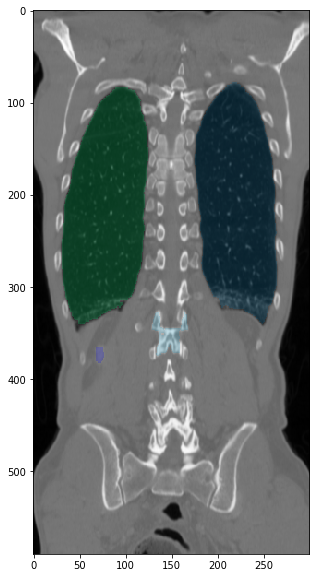

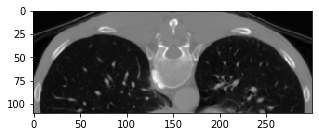

In [13]:
slice_num = 65
display_slice(test_scan, seg_scan, slice_num)
display_slice_axial(test_scan, 320)
# display_slice(res_scan, slice_num)
# display_slice(mask, slice_num)
# display_slice(np.multiply(mask, test_scan), slice_num)
# display_slice(np.multiply(mask, res_scan), slice_num)

In [35]:
test_scan = np.load(test_path + '/10000003_3_MRT1_wb.npz')['data']
fake_scan = np.load(res_path + '/fake_10000003_3_MRT1_wb.npz')['data']
rec_scan = np.load(res_path + '/rec_10000003_3_MRT1_wb.npz')['data']

print(test_scan.shape, fake_scan.shape)

(700, 120, 360) (700, 120, 360)


In [197]:
def display_slices(scan, slice_x, slice_y, slice_z, title):
    fig = plt.figure(figsize=(12, 24))
    rows = 4
    cols = 4
    
    fig.add_subplot(4, 4, 1, title="{} (axial)".format(title)).axis('off')
    plt.imshow(np.flip(scan[slice_x, :, :]))
    
    fig.add_subplot(rows, cols, 2, title="{} (coronal)".format(title)).axis('off')
    plt.imshow(np.flip(scan[:, slice_y, :]))
    
    fig.add_subplot(rows, cols, 3, title="{} (sagittal)".format(title)).axis('off')
    plt.imshow(np.flip(scan[:, :, slice_z]))
    plt.show()

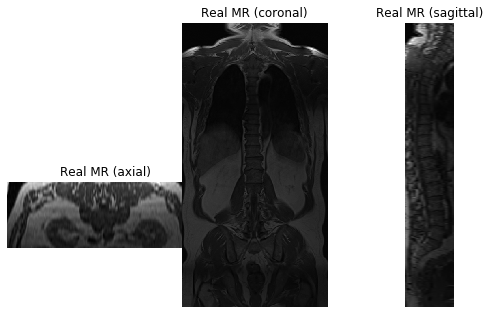

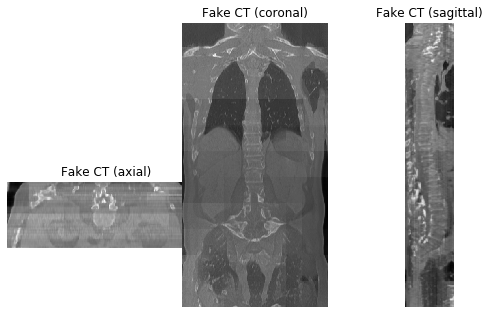

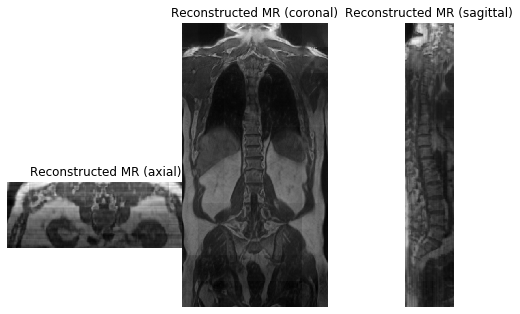

In [198]:
a = 300
b = 65
c = 180

display_slices(test_scan, a, b, c, "Real MR")
display_slices(fake_scan, a, b, c, "Fake CT")
display_slices(rec_scan, a, b, c, "Reconstructed MR")